In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Plot Functions

In [4]:
def plot_paths(paths, labels, xlabel='$epoch$', ylabel=r'$\theta$'):
    
    markers = ('o', '^', 'd', 's', 'p', 'h', '*', '>', '<', 'v', '+', 'h', 'x')
    
    i = 0
    for path, label in zip(paths,labels):
        plt.plot(path[:,0], path[:,1], label=label, 
                 marker=markers[i], lw=1, markersize=4)
        i += 1
    
    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.legend(loc='best')
        

## Defing the appropriate functions

In [5]:
def hypothesis_function(X, theta):
    return X.dot(theta)


def cost_function(X, theta, y):
    N = y.shape[0]
    y_hat = hypothesis_function(X, theta)
    return 1 / N * (y_hat - y).T.dot(y_hat - y)


def error_function(y_hat, y):
    N = y.shape[0]
    return 1 / N * (y_hat - y).T.dot(y_hat - y)

In [6]:
def batch_gradient_descent(X, y, n_epochs=100, eta=0.1):
    
    N, D = X.shape
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)
    #J = cost_function(X, theta, y)

    for epoch in range(n_epochs):
        
        y_hat = hypothesis_function(X, theta)
        
        gradients = 2 / N * X.T.dot(y_hat - y)
        theta = theta - eta * gradients
        J = error_function(y_hat, y)
        
        theta_path.append(theta)
        J_path.append(J)
        
    # end for epoch

    
    return np.array(theta_path), np.array(J_path)



In [7]:

def stochastic_gradient_descent(X, y, n_epochs=100, eta=0.1):
    
    def learning_schedule(t, t0=1, t1=10):
        return t0 / (t + t1)
    
    N, D = X.shape
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        for i in range(N):
            t += 1
            rand_index = np.random.randint(N)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients   
        # end for i
        
           
        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
    
    # end for epoch
    
    return np.array(theta_path), np.array(J_path)


In [9]:
def minibatch_gradient_descent(X, y, n_epochs=100, minibatch_size=20):
    
    def learning_schedule(t, t0=1, t1=10):
        return t0 / (t + t1)
    
    N, D = X.shape
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            t += 1

            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 / minibatch_size * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            
        # end for i
        
        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
        
    # end for epoch
    
    return np.array(theta_path), np.array(J_path)
    

In [10]:
def functinal_batch_sizeGD(X, y, n_epochs=100, eta=0.1):
    
    def mini_batch_size(epoch, n0=5, p=6):  # this is a piecewise linear function interpolation between the points (ns[i],ts[i])
        
        """
        p:  This is a hyperparameter in the following cosine with exponential envelope temperature profile, it must be a non-negative integer
        n0: This is a hyperparameter fixing the initial mini-batch size
        """
      
        return int(np.ceil(n0 * np.cos(2*p*np.pi*epoch / (n_epochs-1))**2 * np.exp(epoch * np.log(m/(n0*np.cos(2*p*np.pi)**2)) / (n_epochs-1))))

    
    N, D = X.shape
    theta_path, J_path = [], []
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        
        minibatch_size = mini_batch_size(epoc)
        
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            t += 1
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 / minibatch_size * xi.T.dot(yi_hat - yi)
            theta = theta - eta * gradients
            
        # end for i
        
        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
        
    # end for epoch
    
    return np.array(theta_path), np.array(J_path)

# Defing input data

In [12]:
N = 100 


X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N,1)

X_b = np.c_[np.ones((N, 1)), X]

theta_path_bgd, J_path_bgd = batch_gradient_descent(X_b, y)
theta_path_sgd, J_path_sgd = stochastic_gradient_descent(X_b, y)
theta_path_mbg, J_path_mbg = minibatch_gradient_descent(X_b, y)
theta_path_fbsgd, J_path_fbsgd = minibatch_gradient_descent(X_b, y)


Now we plot the whole paths.

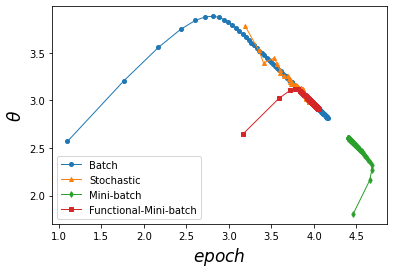

In [13]:
plt.figure(1)
plot_paths([theta_path_bgd, theta_path_sgd, theta_path_mbg, theta_path_fbsgd], 
         ['Batch', 'Stochastic', 'Mini-batch', 'Functional-Mini-batch'])

# The weighted batch size adaptor

In [16]:
def weighted_batch_sizeGD(X, y, n_epochs=100, eta=0.1, temperature=1.0):
    """
    """
    
    N, D = X.shape
    theta_path, J_path = [], []
    
    #minibatch_size = np.random.randint(1, N + 1) # we choose a random int in this interval [1,N]
    theta = np.random.randn(D, 1)
    J = cost_function(X, theta, y)

    for epoch in range(n_epochs):
        
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        while True:
            batch_size_predict = np.random.randint(1, N + 1) # we choose a random int in this interval [1,N]
            theta_predict = np.copy(theta)
            J_predict = 0.0
            count = 0
            
            for i in range(0, N, batch_size_predict):
                xi = X_shuffled[i:i+batch_size_predict]
                yi = y_shuffled[i:i+batch_size_predict]

                yi_hat = hypothesis_function(xi, theta)

                gradients = 2.0 / batch_size_predict * xi.T.dot(yi_hat - yi)
                theta_predict -= eta * gradients
                J_predict += error_function(yi_hat, yi)
                count += 1

            # end for i

            J_predict /= count
        
            deltaJ = J_predict - J;
        
            # now check Boltzman ratio: min{1, exp(-beta*deltaJ)}
            if (deltaJ <= 0) or (np.random.uniform() < np.exp(-deltaJ / temperature)) :
                theta = np.copy(theta_predict)
                J = J_predict
                break
        # end while
        
        
        theta_path.append(theta)
        J_path.append(J)
        
        
    # end for epoch
    
    return np.array(theta_path), np.array(J_path)

In [19]:
theta_path_wbsgd, J_path_wbsgd = weighted_batch_sizeGD(X_b, y, temperature=1.0)

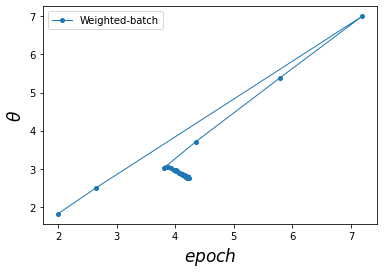

In [20]:
plt.figure(2)
plot_paths([theta_path_wbsgd,], 
         ['Weighted-batch'])